In [1]:
import sys
import numpy as np
from astropy.io import fits
from astroscrappy import detect_cosmics
from matplotlib import pyplot as plt 
sys.path.append('aspired')

import twodspec

In [2]:
# Example data from SPRAT
# LHS6328 companion WD
sprat_data = fits.open('examples/v_e_20180906_22_1_0_2.fits')[0].data

aspired/twodspec.py:99: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


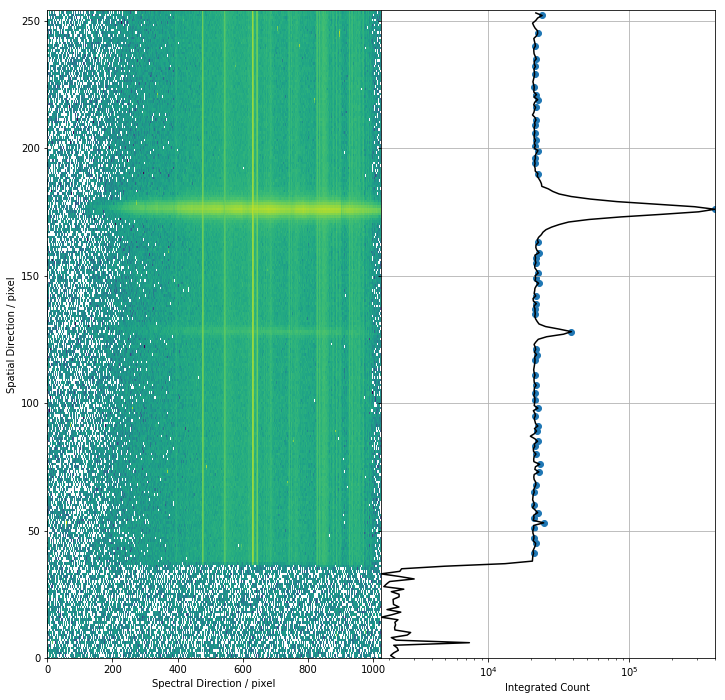

In [3]:
# (1) example of twodspec._find_peaks() without cosmic ray removal

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_data)[Waxis]
spatial_size = np.shape(sprat_data)[Saxis]

# the valid y-range of the chip (an array of int)
ydata = np.arange(spec_size)
ztot = np.sum(sprat_data, axis=Saxis)

peaks_y, heights_y = twodspec._find_peaks(sprat_data, spec_size, spatial_size, ydata, ztot, f_height=0.05, display=True)

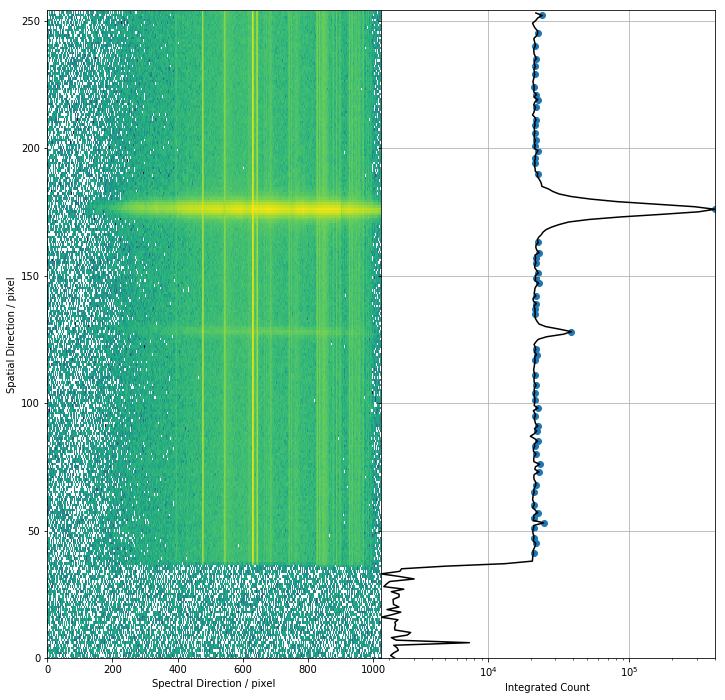

In [4]:
# (2) example of twodspec._find_peaks() with cosmic ray removal
peaks_y, heights_y = twodspec._find_peaks(detect_cosmics(sprat_data)[1], spec_size, spatial_size, ydata, ztot, f_height=0.05, display=True)

Tracing Aperture using nsteps=20


aspired/twodspec.py:245: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


Spectrum 1 : Trace gaussian width = [2.94751393 1.54376803 1.46146913 1.50749228 1.50961544 1.52682242
 1.49347509 1.4820562  1.48738562 1.46975284 1.44172841 1.44389868
 1.42738758 1.43194994 1.41758669 1.41737149 1.42540835 1.37686243
 1.29978828 0.        ] pixels
Step 2 of 20 of spectrum 2 of 7 has a poor fit. Initial guess is used instead.
Spectrum 2 : Trace gaussian width = [0.29749644 0.         1.21347591 1.45178241 1.20888405 1.38724466
 1.32030074 1.24388044 1.1740872  1.1038579  1.08869301 1.12916785
 1.04037396 1.04399216 0.93428328 1.05505984 1.09940977 0.96090127
 0.92006881 0.        ] pixels
Spectrum 3 of 7 is likely to be (1) too faint, (2) in a crowed field, or (3) an extended source. Automated tracing is sub-optimal. Please disable multi-source mode and (1) reduce n_spec, or (2) reduce n_steps,  or (3) provide prevtrace, or (4) all of above.
Spectrum 3 : Trace gaussian width = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] pixels
Step 1 of 20 of spectr

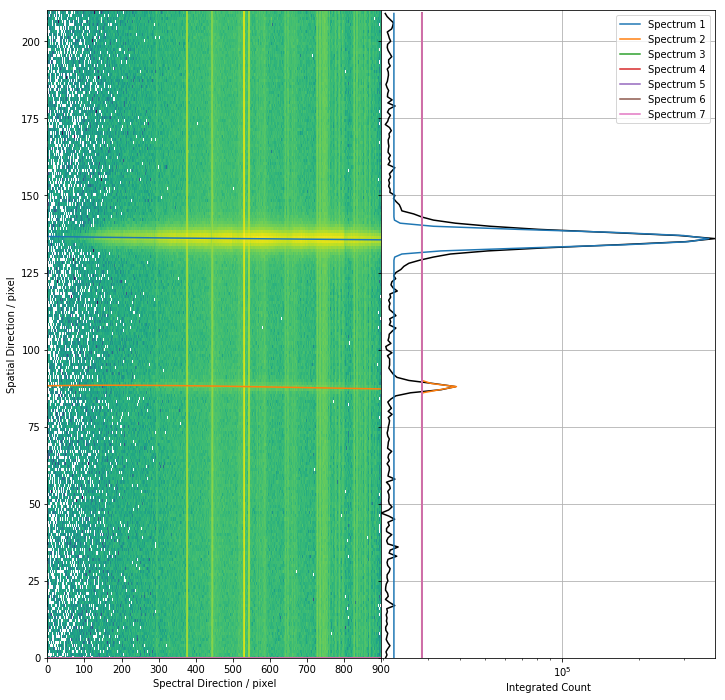

In [5]:
# (3) example of twodspec.ap_trace() with cosmic ray removal, selecting the 7 brightest spectra
#     in the pixel range covered by spatial_mask and spec_mask.
#     The 6th and 7th ones failed, error messages are printed but the code continues to run.

spatial_mask = np.arange(40,250)
spec_mask = np.arange(100,1000)

my, my_sigma = twodspec.ap_trace(sprat_data, nsteps=20, spatial_mask=spatial_mask, spec_mask=spec_mask,
                                cosmic=True, n_spec=7, recenter=False, prevtrace=(0, ), bigbox=8, Saxis=1,
                                nomessage=False, display=True)

aspired/twodspec.py:539: RuntimeWarning: invalid value encountered in log10
  min(median_trace+widthup+skysep+skywidth, len(img[0])), :]),


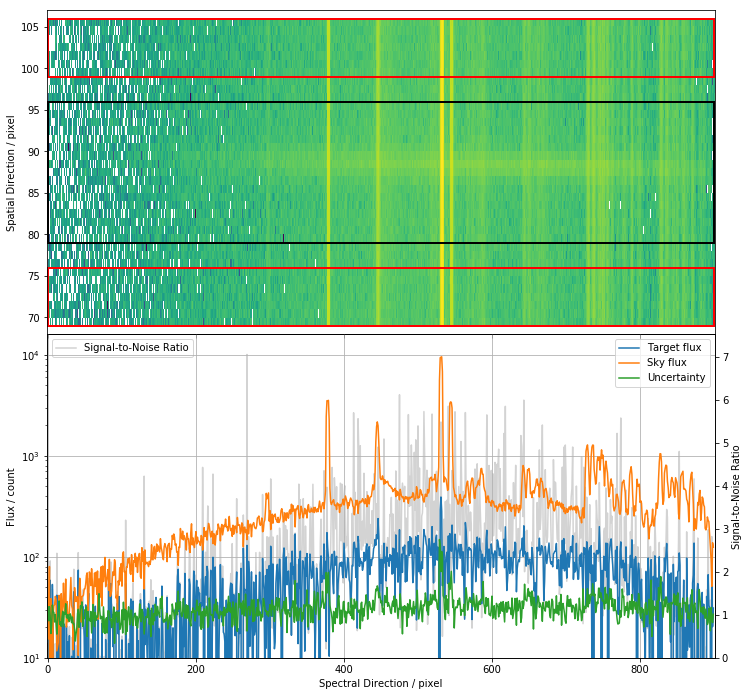

In [6]:
# Aperture my[1]
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[1],
    my_sigma[1],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True,
    optimal=False)

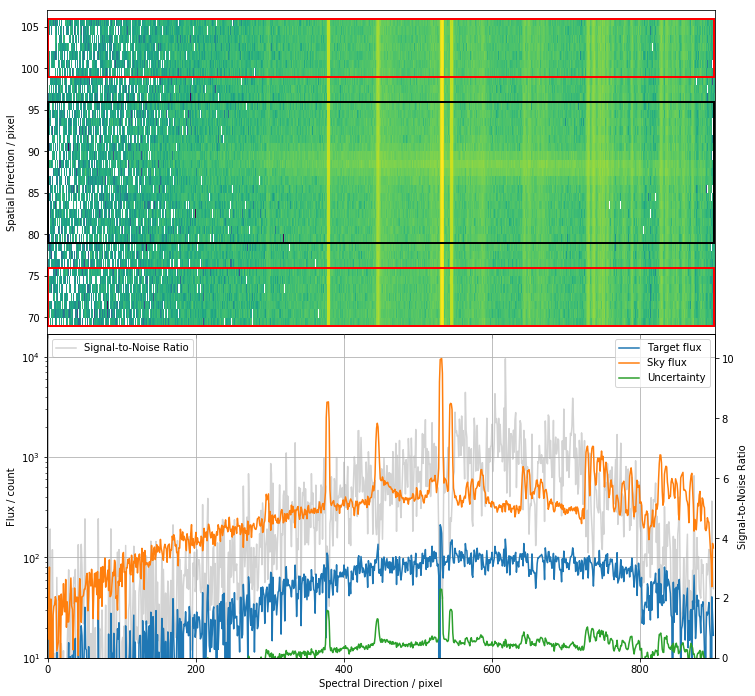

In [7]:
# Optimal my[1]
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    my[1],
    my_sigma[1],
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    display=True)